# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [1]:
# Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [2]:
# Get and display data
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
# Number of null entries?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
# Good, all non_null numeric!
# Get all statistics
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Let's create a subset of the data that has to do only with land / distance metrics. We will then split up the data based on the chas variable. Our hypothesis is that land metrics will have a strong indication of a split based on the chas measurement.

In [22]:
# Get all variables relevant to land information
land = df.loc[:, ['zn', 'indus', 'chas', 'rm', 'dis', 'rad']]

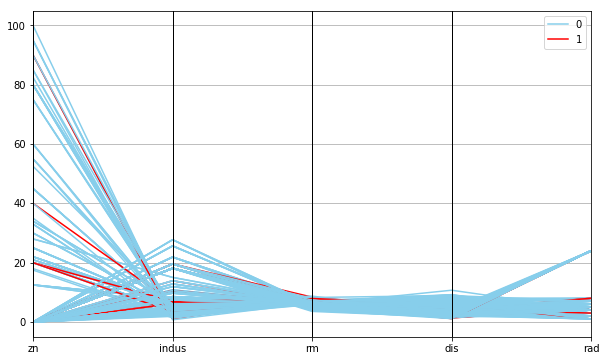

In [119]:
colormap = ('skyblue', 'red')
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(land, 'chas', color=colormap)
plt.show()

It is difficult to see whether these metrics give us a good subset to split over. Let's instead compare every column of the dataset with the chas variable by splitting up the data based on it.

In [58]:
# Normalize data for better visualization
def normalize(dataset):
    dataNorm = (dataset - dataset.mean())/(dataset.std())
    return dataNorm


norm_df = normalize(df)

# Get each df and drop chas column
charles = norm_df.loc[df['chas'] == 1].drop('chas', axis=1)
non_charles = norm_df.loc[df['chas'] == 0].drop('chas', axis=1)

First, let's create a boxplot of the normalized df. Then, we will compare to the charles and non_charles dataframes.

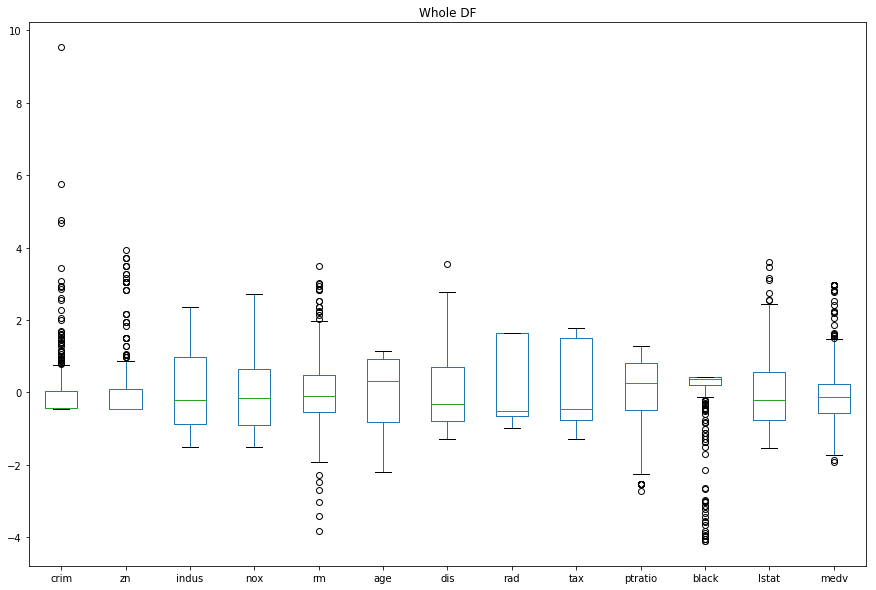

In [120]:
norm_df.drop('chas', axis=1).iloc[:, 1:].plot.box(figsize=(15, 10))
plt.title('Whole DF')
plt.show()

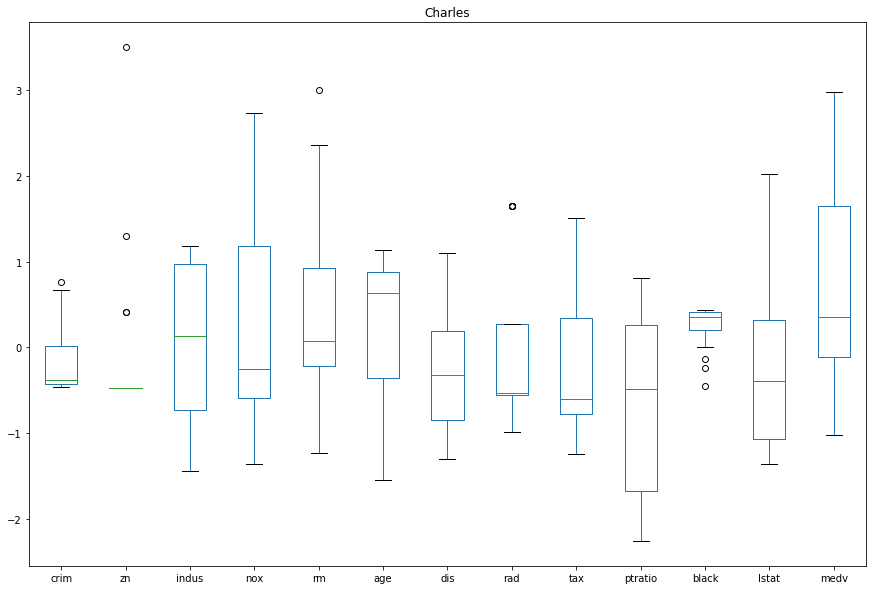

In [121]:
charles.iloc[:, 1:].plot.box(figsize=(15, 10))
plt.title('Charles')
plt.show()

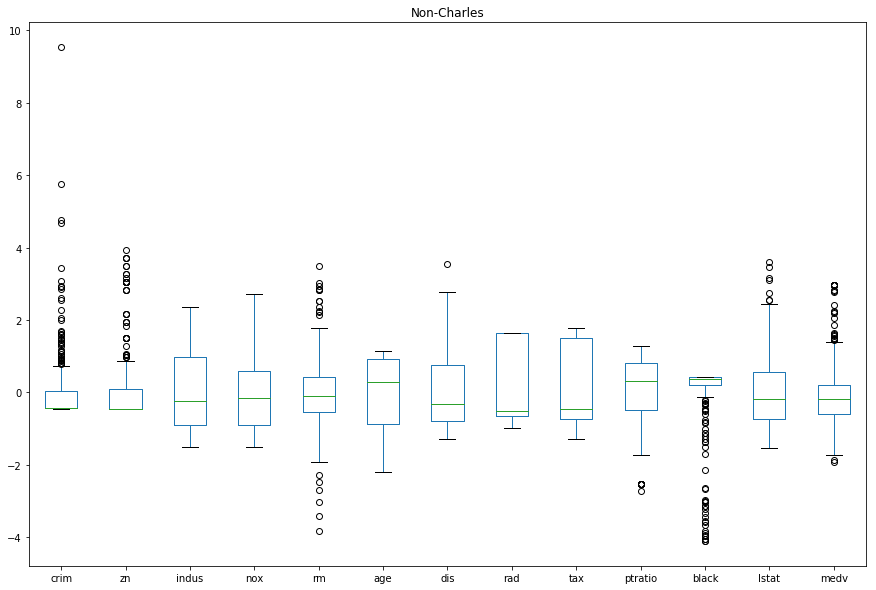

In [122]:
non_charles.iloc[:, 1:].plot.box(figsize=(15, 10))
plt.title('Non-Charles')
plt.show()

Interestingly, it seems that the Non-Charles dataset contains far more outliers than the charles dataset. Furthermore, it seems that homes on the Charles have higher value. This doesn't seem too surprising, since waterfront property is usually more expensive.

Next, we will split based on age. Our hypothesis is that this split will be a good separation to compare based on the medv variable. We will hypothesize that newer buildings are more expensive and compare this to our observations.

In [64]:
old = df.loc[df['age'] >= df['age'].mean()]
new = df.loc[df['age'] < df['age'].mean()]

Old
mean: 20.304145077720207
std:  9.774754015430576

New
mean: 26.166428571428572
std:  6.997076580852499


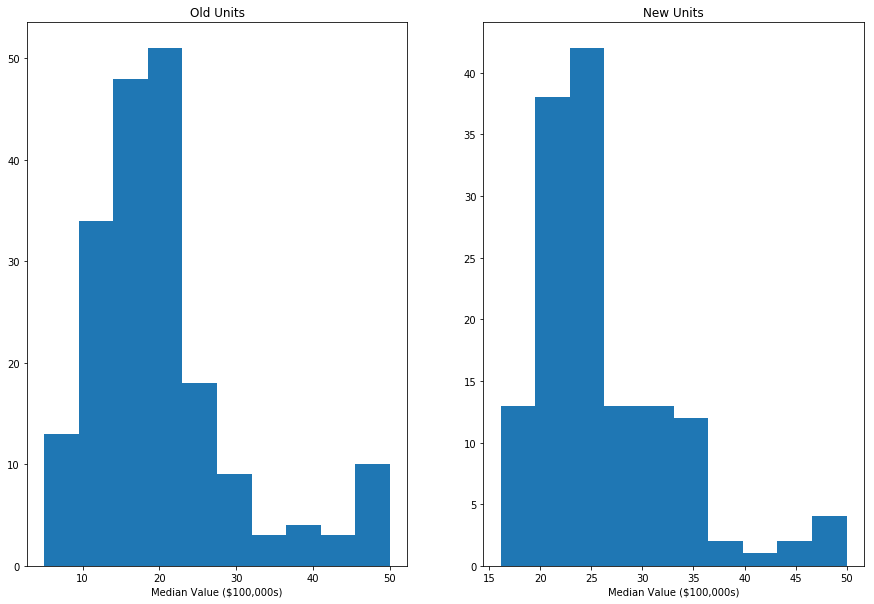

In [116]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(old['medv'], bins=10)
ax1.set_title('Old Units')

ax2.hist(new['medv'], bins=10)
ax2.set_title('New Units')

ax1.set_xlabel('Median Value ($100,000s)'), ax2.set_xlabel('Median Value ($100,000s)')

print('Old\nmean: {}\nstd:  {}'.format(old['medv'].mean(), old['medv'].std()))
print()
print('New\nmean: {}\nstd:  {}'.format(new['medv'].mean(), new['medv'].std()))
plt.show()

It does seem that newer buildings are slightly more expensive overall. Additionally, old buildings have a larger standard deviation in value. Let's confirm this observation by creating a scatterplot of the age column vs the medv column.

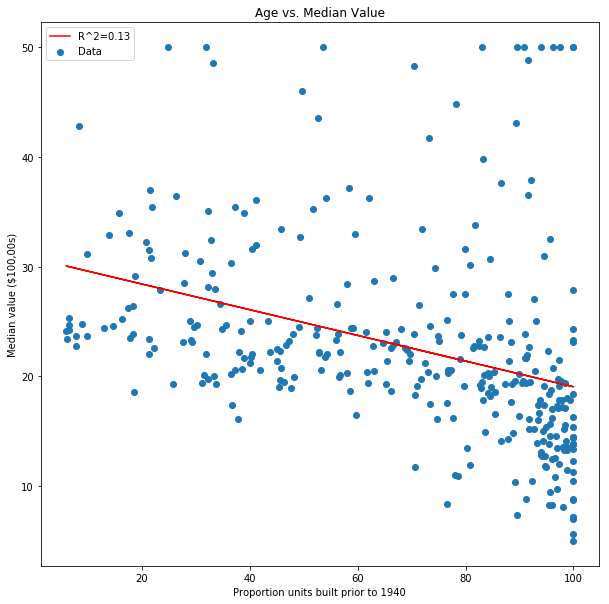

In [117]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Fit linear model
x, y = df[['age']], df[['medv']]
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='R^2=%.2f' % r2_score(y, y_pred))
plt.legend()
plt.xlabel('Proportion units built prior to 1940')
plt.ylabel('Median value ($100,00s)')
plt.title('Age vs. Median Value')
plt.show()

Indeed, it seems that age negatively affects the price of housing units!

Finally, let's see how the nox variable affects other factors. First, we will extract the relevant data as DataFrames. Let's see if if nox and indus are correlated. We will do this similarly to how we compared age with value by using a scatterplot.

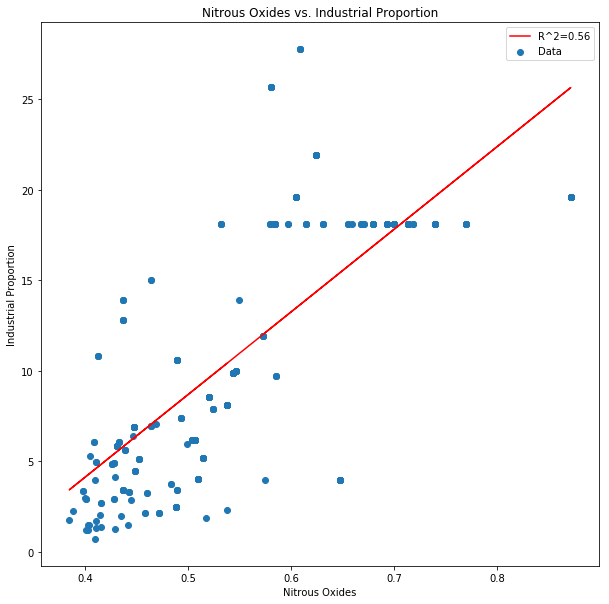

In [126]:
nox = df[['nox']]
indus = df[['indus']]

# Fit linear model 
x, y = nox, indus
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

# Plot
plt.figure(figsize=(10, 10))
plt.plot(x, y_pred, color='red', label='R^2=%.2f' % r2_score(y, y_pred))
plt.scatter(x, y, label='Data')
plt.legend()
plt.title('Nitrous Oxides vs. Industrial Proportion')
plt.xlabel('Nitrous Oxides')
plt.ylabel('Industrial Proportion')
plt.show()

It seems that nox and indus are highly correlated - this isn't too surprising! Let's now see how these variables affect price.

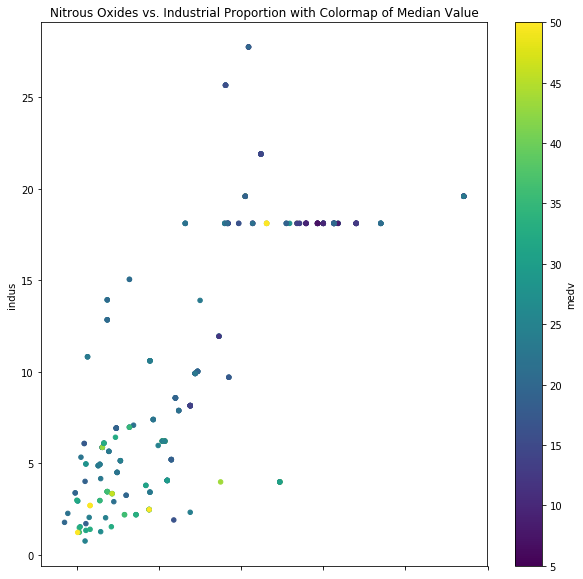

In [149]:
df.plot.scatter('nox', 'indus', 
                c = 'medv',
                colormap = 'viridis', 
                figsize=(10, 10));
plt.title('Nitrous Oxides vs. Industrial Proportion with Colormap of Median Value')
plt.xlabel('nox')
plt.ylabel('indus')
plt.show()

There you have it! As expected, medv seems to be higher in areas with lower nox and indus measurements.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!